In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.register_matplotlib_converters.html
# Register converters for handling timestamp values in plots 

<h2>Kaggle Bike Sharing Demand Dataset</h2>
<h4>To download dataset, sign-in and download from this link: https://www.kaggle.com/c/bike-sharing-demand/data</h4>
<br>

Input Features:<br>
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']<br>
       
Target:<br>
['count']<br>

Objective:

You are provided hourly rental data spanning two years. 
    
For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. 

You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period

Reference: https://www.kaggle.com/c/bike-sharing-demand/data

In [5]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

In [6]:
df = pd.read_csv('train.csv', parse_dates=['datetime'],index_col=0)
df_test = pd.read_csv('test.csv', parse_dates=['datetime'],index_col=0)

In [7]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [9]:
# Add New Features
add_features(df)
add_features(df_test)

In [10]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


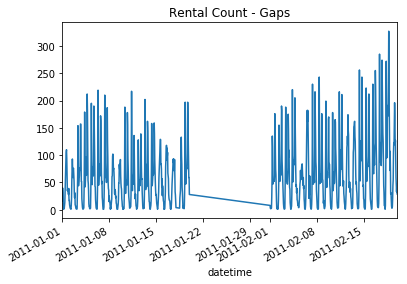

In [8]:
# Need to predict the missing data
plt.title('Rental Count - Gaps')
df['2011-01':'2011-02']['count'].plot()
plt.show()

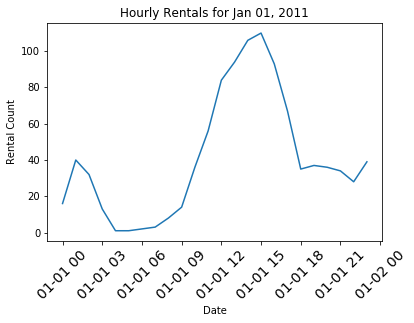

In [11]:
# Rentals change hourly!
plt.plot(df['2011-01-01']['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rentals for Jan 01, 2011')
plt.show()

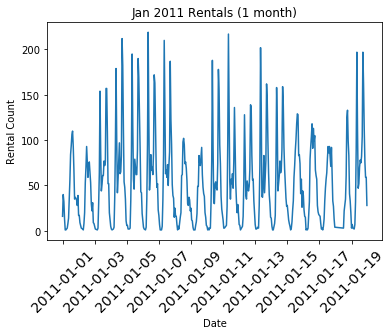

In [12]:
# Seasonal
plt.plot(df['2011-01']['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Jan 2011 Rentals (1 month)')
plt.show()

In [13]:
group_hour = df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()

Text(0.5, 1.0, 'Average Hourly Rental Count')

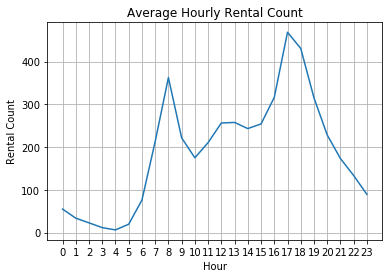

In [14]:
plt.plot(average_by_hour.index,average_by_hour)
plt.xlabel('Hour')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count')

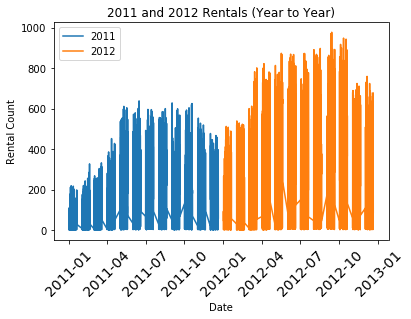

In [16]:
# Year to year trend
plt.plot(df['2011']['count'],label='2011')
plt.plot(df['2012']['count'],label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.legend()
plt.show()

In [17]:
group_year_month = df.groupby(['year','month'])

In [18]:
average_year_month = group_year_month['count'].mean()

In [19]:
average_year_month

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

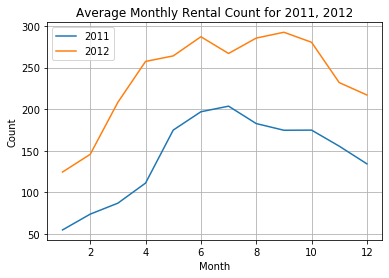

In [20]:
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)
    
plt.legend()    
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rental Count for 2011, 2012')
plt.show()

Text(0.5, 1.0, 'Average Hourly Rental Count - 2011, 2012')

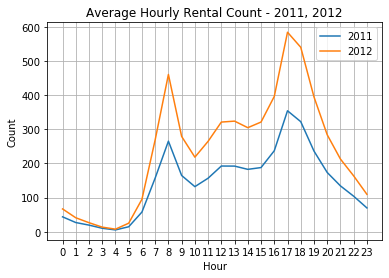

In [21]:
group_year_hour = df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()
for year in average_year_hour.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    plt.plot(average_year_hour[year].index,average_year_hour[year],label=year)
    
plt.legend()    
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count - 2011, 2012')

In [22]:
group_workingday_hour = df.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()

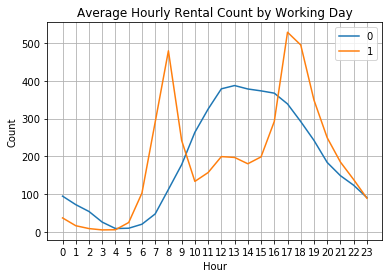

In [23]:
for workingday in average_workingday_hour.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    plt.plot(average_workingday_hour[workingday].index,average_workingday_hour[workingday],
             label=workingday)
    
plt.legend()    
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count by Working Day')
plt.show()

In [24]:
# Let's look at correlation beween features and target
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

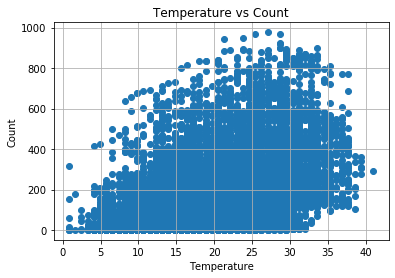

In [25]:
# Any relation between temperature and rental count?
plt.scatter(x=df.temp,y=df["count"])
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')
plt.show()

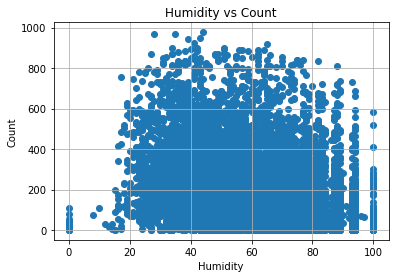

In [26]:
# Any relation between humidity and rental count?
plt.scatter(x=df.humidity,y=df["count"],label='Humidity')
plt.grid(True)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.show()

In [27]:
# Save all data
df.to_csv('bike_all.csv',index=True,index_label='datetime',columns=columns)

## Training and Validation Set
### Target Variable as first column followed by input features
### Training, Validation files do not have a column header

In [28]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [29]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [30]:
rows, train, test

(10886, 7620, 3266)

In [31]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [32]:
# Write Training Set
df.iloc[:train].to_csv('bike_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [33]:
# Write Validation Set
df.iloc[train:].to_csv('bike_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [34]:
# Test Data has only input features
df_test.to_csv('bike_test.csv',index=True,index_label='datetime')

In [35]:
print(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [36]:
# Write Column List
with open('bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))